Ref:
1. SOLPOS online Calc
    https://midcdmz.nrel.gov/solpos/solpos.html
2. Compare the effect of different scalers on data with outliers
    https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
3. Specifying and saving a figure with exact size in pixels
    https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
4. Your DPI calc
    https://www.infobyip.com/detectmonitordpi.php

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp
import descartes
from shapely.geometry import Polygon
from sklearn.preprocessing import MinMaxScaler
import cv2

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
taiwan_grid = gp.read_file("./MapData/taiwan_grid.shp")
taiwan_offgrid = gp.read_file("./MapData/taiwan_offgrid.shp")

assert taiwan_grid.crs == 'epsg:3824' 
assert taiwan_offgrid.crs == 'epsg:3824' 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


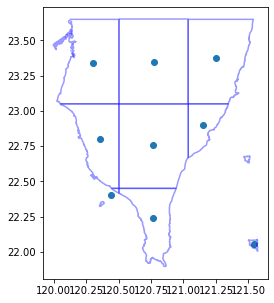

In [3]:
centroid = taiwan_grid['geometry'].centroid

fig, ax = plt.subplots(figsize=(5, 5))
taiwan_grid.boundary.plot(ax=ax, color='b', alpha=0.4, zorder=2)
centroid.plot(ax=ax, zorder=1)
plt.show()

In [4]:
# x: longitude
# y: latitude
location = [[x,y]for x,y in zip(centroid.x, centroid.y)]
#print(location)

In [5]:
# 1/1/2019,12:00:00
scaler = MinMaxScaler(feature_range=(1, 2), copy=False)
etr_global = np.array([976.6518, 986.2141, 993.2112, 976.4609, 986.9810, 996.1500, 976.0328, 984.4011, 999.2476]).reshape(-1, 1)
scaler.fit_transform(etr_global)
taiwan_grid['ETR_Global'] = etr_global
taiwan_grid

,FID,geometry,ETR_Global
0,0,"MULTIPOLYGON (((120.12691 23.65000, 120.50333 ...",1.026664
1,1,"POLYGON ((120.05167 23.05000, 120.50333 23.050...",1.438569
2,2,"MULTIPOLYGON (((120.44651 22.45000, 120.50333 ...",1.739976
3,3,"POLYGON ((120.50333 23.65000, 120.63506 23.650...",1.018441
4,4,"POLYGON ((120.50333 23.05000, 121.03667 23.050...",1.471604
5,5,"POLYGON ((120.50333 22.45000, 120.94334 22.450...",1.866568
6,6,"POLYGON ((121.03667 23.65000, 121.23044 23.650...",1.000000
7,7,"MULTIPOLYGON (((121.03667 23.05000, 121.34454 ...",1.360473
8,8,"MULTIPOLYGON (((121.57000 22.08694, 121.57000 ...",2.000000


In [6]:
taiwan_offgrid['ETR_Global'] = [0 for i in range(len(taiwan_offgrid))]
taiwan_offgrid

,FID,geometry,ETR_Global
0,0,"POLYGON ((119.97000 23.65000, 120.12691 23.650...",0
1,1,"POLYGON ((119.97000 23.05000, 120.05167 23.050...",0
2,2,"POLYGON ((119.97000 22.45000, 120.44651 22.450...",0
3,3,"POLYGON ((121.03667 22.66851, 121.03667 22.450...",0
4,4,"POLYGON ((120.89630 22.24643, 120.89627 22.246...",0
5,5,"POLYGON ((121.53867 23.65000, 121.57000 23.650...",0
6,6,"POLYGON ((121.34454 23.05000, 121.57000 23.050...",0
7,7,"MULTIPOLYGON (((121.03667 22.45000, 121.57000 ...",0


In [7]:
solpos = pd.concat([taiwan_grid, taiwan_offgrid], ignore_index=True)

assert solpos.crs == 'epsg:3824' 
#solpos.to_file("solpos.shp")
solpos

,FID,geometry,ETR_Global
0,0,"MULTIPOLYGON (((120.12691 23.65000, 120.50333 ...",1.026664
1,1,"POLYGON ((120.05167 23.05000, 120.50333 23.050...",1.438569
2,2,"MULTIPOLYGON (((120.44651 22.45000, 120.50333 ...",1.739976
3,3,"POLYGON ((120.50333 23.65000, 120.63506 23.650...",1.018441
4,4,"POLYGON ((120.50333 23.05000, 121.03667 23.050...",1.471604
5,5,"POLYGON ((120.50333 22.45000, 120.94334 22.450...",1.866568
6,6,"POLYGON ((121.03667 23.65000, 121.23044 23.650...",1.000000
7,7,"MULTIPOLYGON (((121.03667 23.05000, 121.34454 ...",1.360473
8,8,"MULTIPOLYGON (((121.57000 22.08694, 121.57000 ...",2.000000
9,0,"POLYGON ((119.97000 23.65000, 120.12691 23.650...",0.000000


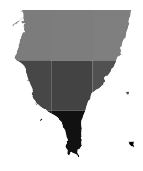

[200. 200.]


In [51]:
# 100 pixel = 1" DPI
dpi = 100
width_pixel = 200
height_pixel = 200

fig, ax = plt.subplots(figsize=(width_pixel/dpi, height_pixel/dpi), dpi=dpi)
solpos.plot(ax=ax, column='ETR_Global', cmap='gray_r')
plt.axis('off')
plt.xlim(left=taiwan_offgrid.total_bounds[0], right=taiwan_offgrid.total_bounds[2])
plt.ylim(bottom=taiwan_offgrid.total_bounds[1], top=taiwan_offgrid.total_bounds[3])
#print(plt.xlim(), plt.ylim())

# To save it in the same resolution as the screen just use the same dpi
plt.savefig('./FeatMap/solpos.png', dpi=dpi)
plt.show()

print(fig.get_size_inches()*fig.dpi) # size in pixels

In [43]:
img = cv2.imread('./FeatMap/solpos.png')
img.shape

(200, 200, 3)

In [36]:
solpos.plot(ax=ax, column='ETR_Global', cmap='gray_r') 
fig = plt.gcf()
print(fig.get_size_inches()*fig.dpi) # size in pixels

[432. 288.]


<Figure size 432x288 with 0 Axes>